# 03. PyTorch Computer Vision Exercise Solutions


In [ ]:
# Check for GPU
!nvidia-smi

Fri Jun 14 15:25:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.3.0+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Активно используется в системах распознавания объектов и лиц, где это необходимо. Как в промышленных и социальных сферах, так и в военной тематике.
2. Используется в беспилотных устройствах. К примеру, для обнаружения объектов для ориентации в пространстве, после чего предпринятия каких-либо действий, запрограммированных в устройстве.
3. В медицине может использоваться для распознавания поврежденных тканей, либо, к примеру, детерминации злокачественных тканей в организме.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Я погуглил и нашёл, что "Переобучение — нежелательное поведение машинного обучения, которое возникает, когда модель машинного обучения дает точные прогнозы для обучающих данных, но не для новых данных.", в общем, жоско...

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.
1. Ранняя остановка.
Ранняя остановка приостанавливает этап обучения до того, как модель машинного обучения узнает шум в данных. Однако важно правильно выбрать время, иначе модель все равно не даст точных результатов.
2. Обрезка.
При построении модели можно определить несколько объектов или параметров, влияющих на окончательный прогноз. Выборка объектов (или сокращение) определяет наиболее важные функции в обучающем наборе и устраняет ненужные. Например, чтобы предсказать, является ли изображение животным или человеком, вы можете посмотреть на различные входные параметры, такие как форма лица, положение ушей, структура тела и т. д. Вы можете отдавать предпочтение форме лица и игнорировать форму глаз.
3. Регуляризация.
Регуляризация – это набор методов обучения/оптимизации, направленных на сокращение переоснащения. Эти методы пытаются устранить те факторы, которые не влияют на результаты прогнозирования, путем оценки объектов на основе важности. Например, математические вычисления применяют штрафы к объектам с минимальным воздействием. Рассмотрим статистическую модель, пытающуюся предсказать цены на жилье в городе через 20 лет. Регуляризация даст меньшее значение штрафа для таких характеристик, как рост населения и среднегодовой доход, но большее значение штрафа для среднегодовой температуры в городе.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

Я загрузил фотографию сырников и сеть подумала, что это эспрессо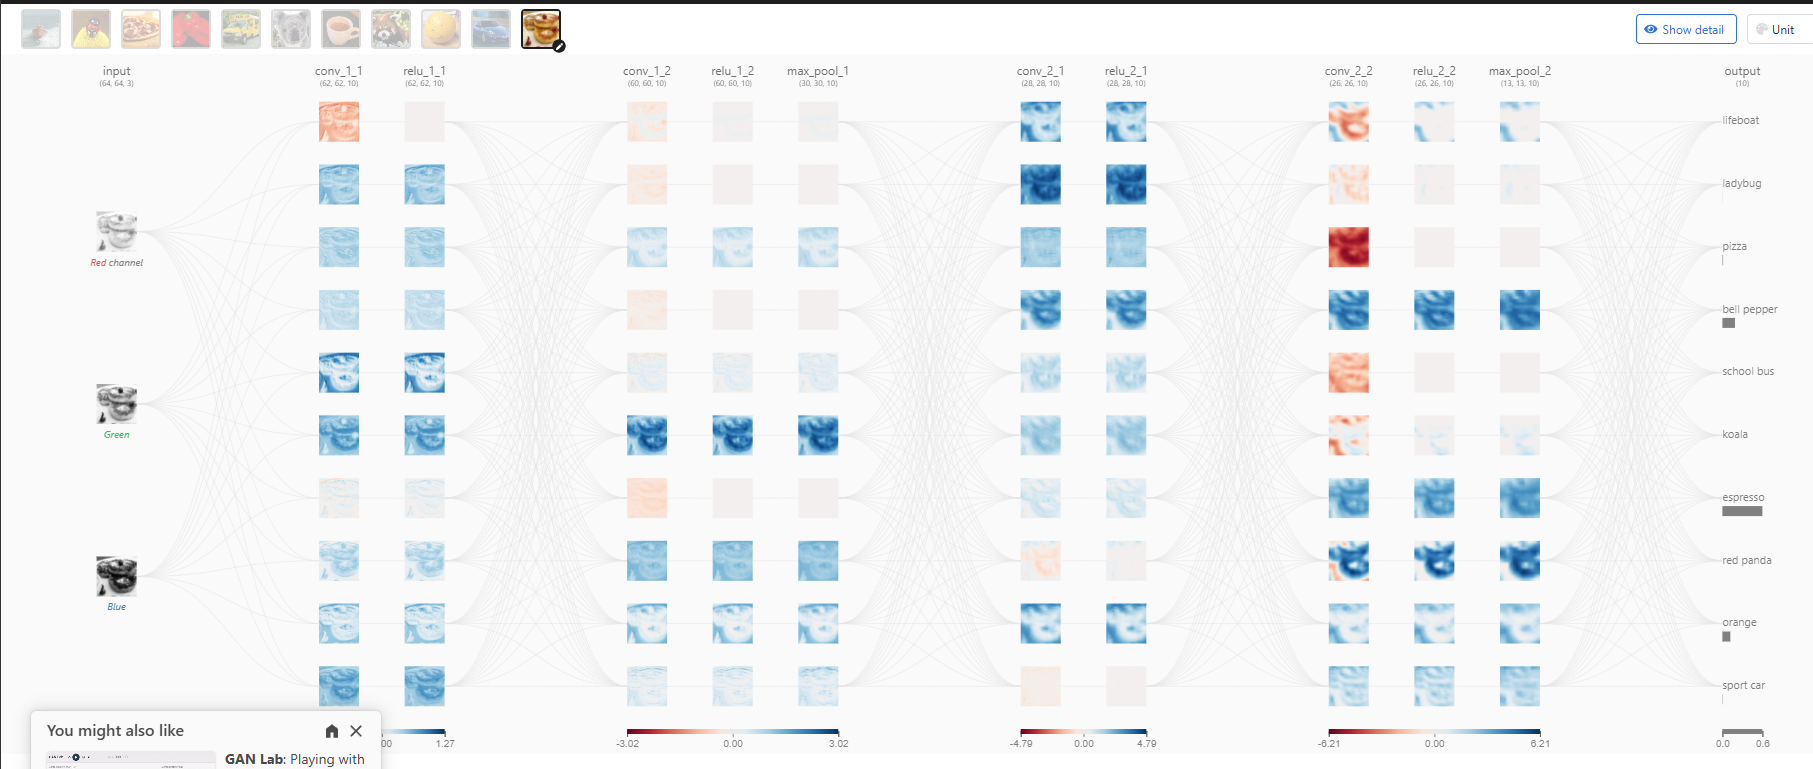

The CNN explainer website is a great insight into all of the nuts and bolts of a convolutional neural network.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torchvision
from torchvision import datasets

from torchvision import transforms

In [ ]:
train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

test_data = datasets.MNIST(root=".",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15288329.93it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 488533.11it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4378437.82it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10607198.65it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n {img}")
print(f"Label:\n {label}")

Image:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
print(f"Image shape: {img.shape} -> [color_channels, height, width] (CHW)")
print(f"Label: {label} -> no shape, due to being integer")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width] (CHW)
Label: 5 -> no shape, due to being integer


In [ ]:
# Получаю имена классов
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

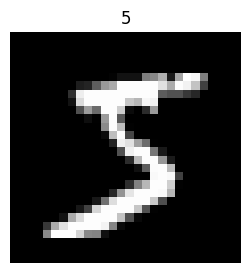

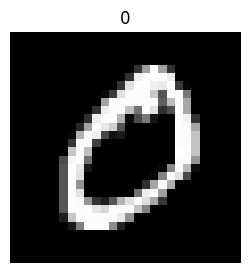

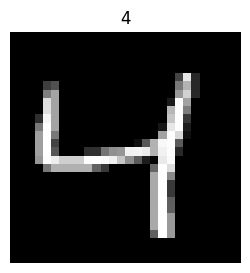

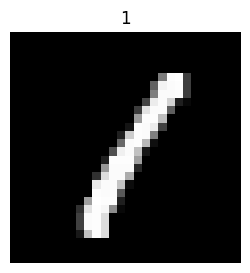

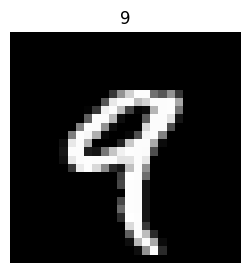

In [ ]:
import matplotlib.pyplot as plt

# Предполагаем, что 'train_data' уже загружен и содержит изображения и метки

for i in range(5):
    img = train_data[i][0]  # Получаем изображение
    label = train_data[i][1]  # Получаем метку изображения

    # Убедимся, что изображение имеет два измерения перед отображением
    if img.ndim > 2:
        img_squeeze = img.squeeze()  # Убираем лишние измерения
    else:
        img_squeeze = img  # Используем изображение как есть

    plt.figure(figsize=(3, 3))  # Задаем размер фигуры
    plt.imshow(img_squeeze, cmap="gray")  # Отображаем изображение в оттенках серого
    plt.title(label)  # Добавляем метку как заголовок
    plt.axis('off')  # Убираем оси
    plt.show()  # Показываем изображение


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
# Создание загрузчика данных для обучения
from torch.utils.data import DataLoader

# Инициализация DataLoader для обучающего набора данных
train_dataloader = DataLoader(dataset=train_data,  # Указываем набор данных для обучения
                              batch_size=32,       # Размер пакета
                              shuffle=True)        # Перемешивание данных

# Инициализация DataLoader для тестового набора данных
test_dataloader = DataLoader(dataset=test_data,   # Указываем набор данных для тестирования
                             batch_size=32,       # Размер пакета
                             shuffle=False)       # Без перемешивания данных


In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x793f53077820>,
 <torch.utils.data.dataloader.DataLoader at 0x793f530779d0>)

In [ ]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch import nn
class MNIST_model(torch.nn.Module):
  """Model capable of predicting on MNIST dataset.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    print(f"Output shape of conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    print(f"Output shape of conv block 2: {x.shape}")
    x = self.classifier(x)
    print(f"Output shape of classifier: {x.shape}")
    return x

In [ ]:
device

'cuda'

In [ ]:
model = MNIST_model(input_shape=1,
                    hidden_units=10,
                    output_shape=10).to(device)
print(model)

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


In [ ]:
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
model(dummy_x)

Output shape of conv block 1: torch.Size([1, 10, 14, 14])
Output shape of conv block 2: torch.Size([1, 10, 7, 7])
Output shape of classifier: torch.Size([1, 10])


tensor([[ 0.0410, -0.0438, -0.0086, -0.1068, -0.0208, -0.0356,  0.0264,  0.0602,
          0.0978, -0.0252]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
dummy_x_2 = torch.rand(size=([1, 10, 7, 7]))
dummy_x_2.shape

torch.Size([1, 10, 7, 7])

In [ ]:
flatten_layer = nn.Flatten()
flatten_layer(dummy_x_2).shape

torch.Size([1, 490])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
%%time
from tqdm.auto import tqdm

# Обучение на CPU
model_cpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to("cpu")

# Создаем функцию потерь и оптимизатор
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Цикл обучения
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_cpu.train()

    # Перемещаем данные на CPU
    X, y = X.to("cpu"), y.to("cpu")

    # Прямой проход
    y_pred = model_cpu(X)

    # Расчет потерь
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Обнуление градиентов оптимизатора
    optimizer.zero_grad()

    # Обратное распространение потерь
    loss.backward()

    # Шаг оптимизатора
    optimizer.step()

  # Корректировка потерь обучения с учетом количества пакетов
  train_loss /= len(train_dataloader)

  ### Цикл тестирования
  test_loss_total = 0

  # Переключение модели в режим оценки
  model_cpu.eval()

  # Включение режима вывода
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Убедимся, что тестовые данные находятся на CPU
      X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    test_loss_total /= len(test_dataloader)

  # Вывод информации о процессе
  print(f"Эпоха: {epoch} | Потери при обучении: {train_loss:.3f} | Потери при тестировании: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Выходные данные были обрезаны до нескольких последних строк (5000).
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
O

In [ ]:
%%time
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"  # Определение устройства для обучения

# Обучение на GPU
model_gpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

# Создание функции потерь и оптимизатора
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

# Цикл обучения
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  model_gpu.train()  # Переключение модели в режим обучения
  for batch, (X, y) in enumerate(train_dataloader):
    # Перемещение данных на целевое устройство
    X, y = X.to(device), y.to(device)

    # Прямой проход
    y_pred = model_gpu(X)

    # Расчет потерь
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()  # Добавление значения потерь

    # Обнуление градиентов оптимизатора
    optimizer.zero_grad()

    # Обратное распространение потерь
    loss.backward()

    # Шаг оптимизатора
    optimizer.step()

  # Корректировка потерь обучения с учетом количества пакетов
  train_loss /= len(train_dataloader)

  ### Цикл тестирования
  test_loss_total = 0
  model_gpu.eval()  # Переключение модели в режим оценки
  with torch.inference_mode():  # Включение режима вывода
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Убедимся, что тестовые данные на целевом устройстве
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = model_gpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss.item()  # Добавление значения потерь

    # Корректировка общих потерь тестирования с учетом количества пакетов
    test_loss_total /= len(test_dataloader)

  # Вывод информации о процессе
  print(f"Эпоха: {epoch} | Потери при обучении: {train_loss:.3f} | Потери при тестировании: {test_loss_total:.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Выходные данные были обрезаны до нескольких последних строк (5000).
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
O

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

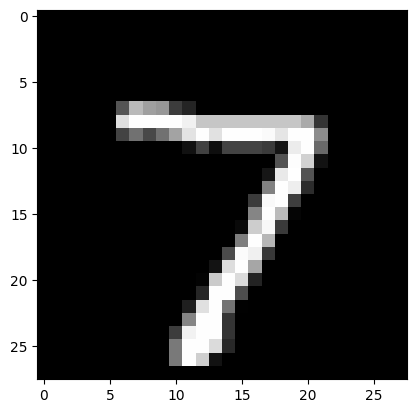

In [ ]:
# Делаем предсказание с тестовой моделью
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [ ]:
model_pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device)) # убеждаемся, что нужная форма и на нужном девайсе
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

Output shape of conv block 1: torch.Size([1, 10, 14, 14])
Output shape of conv block 2: torch.Size([1, 10, 7, 7])
Output shape of classifier: torch.Size([1, 10])


tensor([7], device='cuda:0')

Output shape of conv block 1: torch.Size([1, 10, 14, 14])
Output shape of conv block 2: torch.Size([1, 10, 7, 7])
Output shape of classifier: torch.Size([1, 10])
Output shape of conv block 1: torch.Size([1, 10, 14, 14])
Output shape of conv block 2: torch.Size([1, 10, 7, 7])
Output shape of classifier: torch.Size([1, 10])
Output shape of conv block 1: torch.Size([1, 10, 14, 14])
Output shape of conv block 2: torch.Size([1, 10, 7, 7])
Output shape of classifier: torch.Size([1, 10])
Output shape of conv block 1: torch.Size([1, 10, 14, 14])
Output shape of conv block 2: torch.Size([1, 10, 7, 7])
Output shape of classifier: torch.Size([1, 10])
Output shape of conv block 1: torch.Size([1, 10, 14, 14])
Output shape of conv block 2: torch.Size([1, 10, 7, 7])
Output shape of classifier: torch.Size([1, 10])


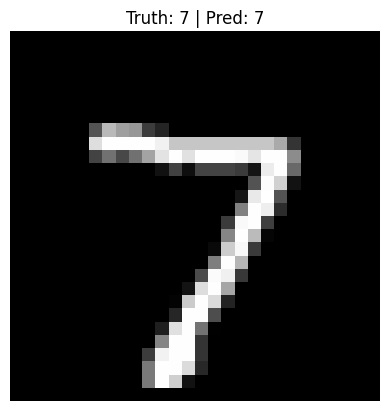

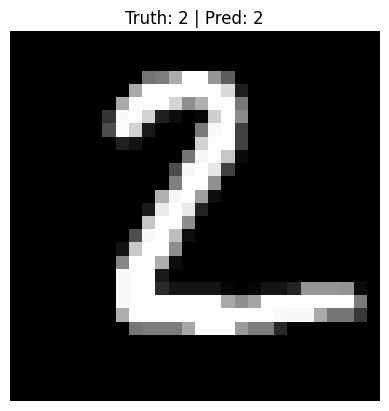

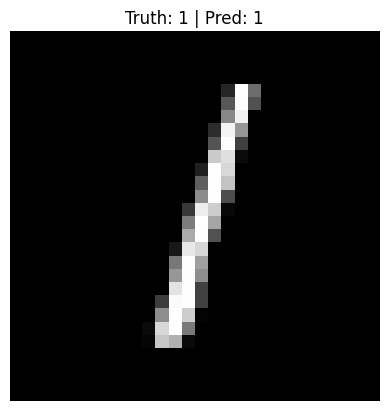

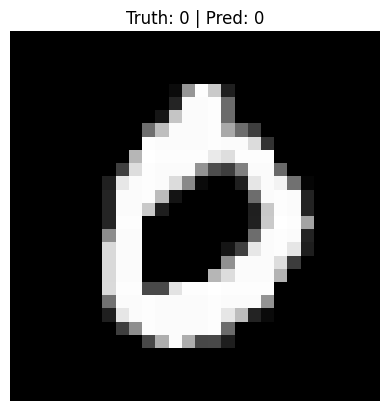

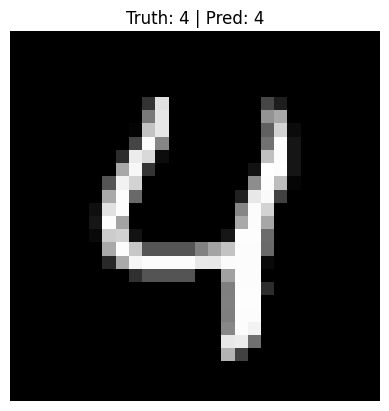

In [ ]:
num_to_plot = 5
for i in range(num_to_plot):
  # Берем изображение и название
  img = test_data[i][0]
  label = test_data[i][1]

  # Делаем предсказание
  model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Строим изображение
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 62.4 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [ ]:
# Импорт mlxtend
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19

0.23.1


In [ ]:
# Делаем предсказания по всем тестовым данным
from tqdm.auto import tqdm
model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # проверим девайс
    X, y = X.to(device), y.to(device)
    y_pred_logits = model_gpu(X)
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output sha

10000

In [ ]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

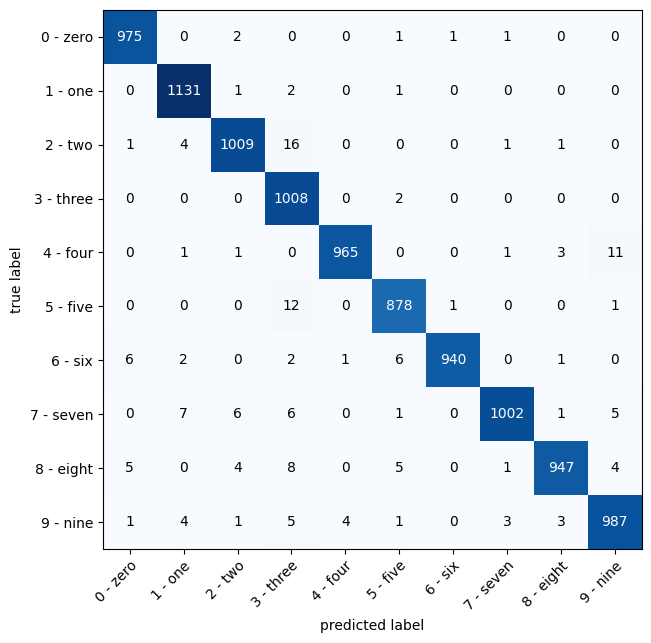

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.


In [ ]:
# Качаем фэшнмнист, тестовые и тренировочные
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

(60000, 10000)

In [ ]:
# Получаем имена классов
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [ ]:
model_2 = MNIST_model(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_2

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Устанавливаем оптимизатор и функцию потерь
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [ ]:
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(num_classes=len(fashion_mnist_class_names)).to(device)

epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0

  model_2.train()
  for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += acc_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc /= len(fashion_mnist_train_dataloader)

  model_2.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      y_pred_test = model_2(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss

      test_acc += acc_fn(y_pred_test, y_test)

    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)

  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")

TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'

In [ ]:
# Предсказания для 2 модели
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu()
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output shape of conv block 1: torch.Size([32, 10, 14, 14])
Output shape of conv block 2: torch.Size([32, 10, 7, 7])
Output shape of classifier: torch.Size([32, 10])
Output sha

(tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), 10000)

In [ ]:
# Неправильные предсказания
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

9019

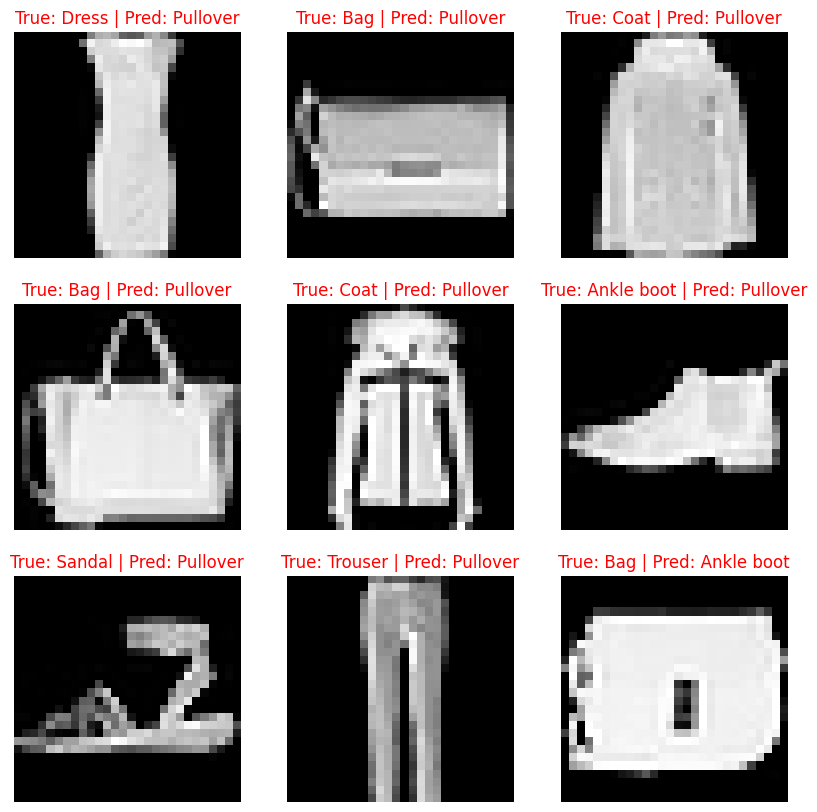

In [ ]:
# возьмем 9 рандомных модных вещичек
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # берем настоящие и предсказанные названия
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # напишем их
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);

Почему-то не получается предсказать точно, может быть ввиду схожести вещей(